# Jupyter Workflow - Reproducible Data Analysis
### Video Tutorial Series with Jake Vanderplas


In [22]:
import urllib3
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

In [23]:
# Not getting full dataset through API - Connection has changed since video tutorial.

# URL = 'https://data.seattle.gov/resource/4xy5-26gy.csv'
# c = urllib3.PoolManager()
# with c.request('GET', URL, preload_content=False) as resp, open('Fremont.csv', 'wb') as out_file:
#    shutil.copyfileobj(resp, out_file)
# resp.release_conn()  

In [24]:
data = pd.read_csv('./Fremont.csv', index_col='Date', parse_dates=True)
#data = data.rename(columns={'date': 'Date', 'fremont_bridge_nb': 'Fremont Bridge West Sidewalk', 'fremont_bridge_sb': 'Fremont Bridge East Sidewalk'})
data.shape

(47400, 2)

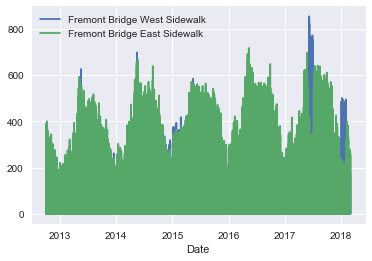

In [26]:
data.plot()

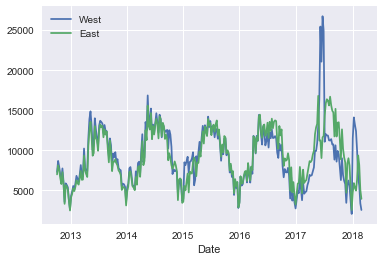

In [33]:
data.columns = ['West', 'East']

data.resample('W').sum().plot()

(0, 1084639.05)

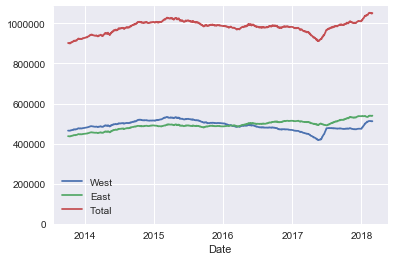

In [34]:
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

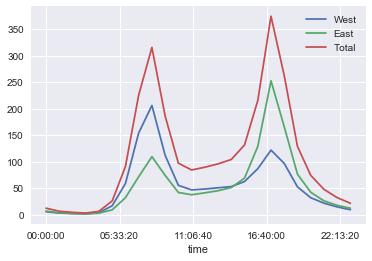

In [35]:
data.groupby(data.index.time).mean().plot()

In [38]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


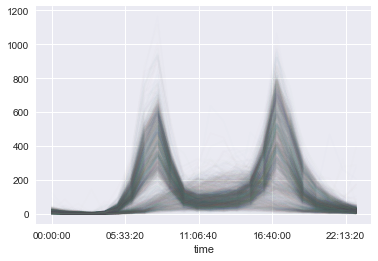

In [40]:
pivoted.plot(legend=False, alpha=0.01)